<a href="https://colab.research.google.com/github/jacobpad/jacobpad.github.io/blob/master/data/U1_Build_Week_Jacob_Padgett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run the first 3 cells to download packages, then restart runtime

If you're going to run all, comment out the second cell with a # in the begenning of each line.

In [1]:
# A bunch of imports, yes, it's probably overkill
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.font_manager # Needed for graph fonts
from IPython.core.display import HTML # Needed for graph fonts
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [0]:
# # These downloads take a minute or so - just hold on
# # Wait for the spinning circle to stop
# !pip install matplotlib==3.0.0
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Import & clean/reduce data

In [4]:
# URL
url = 'https://raw.githubusercontent.com/jacobpad/jacobpad.github.io/master/data/all_month.csv'

# Read in dataset
df = pd.read_csv(url)
df.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-01-28T23:20:04.732Z,61.427500,-149.908900,30.80,1.60,ml,NaN,NaN,NaN,0.63,ak,ak0201aouzfc,2020-01-28T23:25:38.638Z,"10km SSE of Big Lake, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2020-01-28T23:18:37.420Z,35.057333,-118.322167,0.07,1.99,ml,34.0,34.0,0.06846,0.23,ci,ci39285400,2020-01-28T23:22:44.432Z,"14km W of Mojave, CA",earthquake,0.29,31.61,0.227,26.0,automatic,ci,ci


In [5]:
# Drop the columns I don't want - time, id & updated
df = df.drop(columns=['id', 'updated', 'horizontalError', 'depthError', 
                      'gap', 'magError', 'magNst', 'dmin', 'nst',
                      'locationSource',	'magSource'])
df.head(2)

,time,latitude,longitude,depth,mag,magType,rms,net,place,type,status
0,2020-01-28T23:20:04.732Z,61.427500,-149.908900,30.80,1.60,ml,0.63,ak,"10km SSE of Big Lake, Alaska",earthquake,automatic
1,2020-01-28T23:18:37.420Z,35.057333,-118.322167,0.07,1.99,ml,0.23,ci,"14km W of Mojave, CA",earthquake,automatic


In [6]:
# Run pandas_profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)
/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,11
Number of observations,12397
Total Missing (%),0.0%
Total size in memory,1.0 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
# See what the type of each column is
df.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
magType       object
rms          float64
net           object
place         object
type          object
status        object
dtype: object

In [8]:
# How many nulls are there?
df.isnull().sum().sort_values()

time         0
latitude     0
longitude    0
depth        0
rms          0
net          0
place        0
type         0
status       0
mag          1
magType      1
dtype: int64

In [9]:
# See all rows with null values
df[pd.isnull(df).any(axis=1)]

,time,latitude,longitude,depth,mag,magType,rms,net,place,type,status
3363,2020-01-19T05:34:29.270Z,38.773667,-122.7175,2.28,NaN,NaN,0.02,nc,"2km W of Anderson Springs, CA",earthquake,reviewed


In [10]:
# Continue hunting for bad values
df['magType'].isnull().value_counts()

False    12396
True         1
Name: magType, dtype: int64

In [11]:
# See the magType value counts
df['magType'].value_counts() #.sum()

ml       7464
md       4151
mb        643
mww        88
mwr        26
mb_lg      10
mwp         5
mh          5
mw          4
Name: magType, dtype: int64

In [12]:
# filter based on specific conditions
df_new = df[df['mag'] == 2.28]
df_new

,time,latitude,longitude,depth,mag,magType,rms,net,place,type,status
595,2020-01-26T18:33:42.630Z,35.105167,-97.776000,7.01,2.28,ml,0.26,ok,"12km WSW of Blanchard, Oklahoma",earthquake,reviewed
930,2020-01-25T17:50:35.860Z,17.938300,-66.952600,6.00,2.28,md,0.09,pr,"7km SSW of Guanica, Puerto Rico",earthquake,reviewed
956,2020-01-25T15:59:00.700Z,17.932100,-66.835600,11.00,2.28,ml,0.20,pr,"7km SSW of Indios, Puerto Rico",earthquake,reviewed
1571,2020-01-23T20:52:30.090Z,35.797000,-121.248167,10.84,2.28,md,0.07,nc,"18km NNW of San Simeon, CA",earthquake,reviewed
1796,2020-01-23T08:45:43.440Z,51.870667,-177.849167,5.97,2.28,ml,0.24,av,"20km E of Tanaga Volcano, Alaska",earthquake,reviewed
2219,2020-01-22T13:42:23.880Z,36.015000,-117.614000,1.25,2.28,ml,0.15,ci,"28km ENE of Little Lake, CA",earthquake,automatic
2232,2020-01-22T13:04:44.670Z,19.178833,-155.475998,35.52,2.28,md,0.11,hv,"2km S of Pahala, Hawaii",earthquake,automatic
2285,2020-01-22T09:49:02.720Z,19.201834,-155.418671,30.34,2.28,ml,0.16,hv,"6km E of Pahala, Hawaii",earthquake,automatic
2286,2020-01-22T09:49:01.900Z,19.184000,-155.412338,33.89,2.28,ml,0.19,hv,"7km ESE of Pahala, Hawaii",earthquake,automatic
2998,2020-01-20T08:19:11.510Z,19.136333,-155.432007,32.25,2.28,md,0.12,hv,"9km SSE of Pahala, Hawaii",earthquake,automatic


In [13]:
# Check nulls again
df.isnull().sum().sort_values()

time         0
latitude     0
longitude    0
depth        0
rms          0
net          0
place        0
type         0
status       0
mag          1
magType      1
dtype: int64

In [14]:
# See the index of the mising values in my mag & magType columns
print(df.shape)
df[3363:3364]

(12397, 11)


,time,latitude,longitude,depth,mag,magType,rms,net,place,type,status
3363,2020-01-19T05:34:29.270Z,38.773667,-122.7175,2.28,NaN,NaN,0.02,nc,"2km W of Anderson Springs, CA",earthquake,reviewed


In [0]:
# Drop the NaN 'mag'
df.drop(index=3363, inplace=True)

In [16]:
# Drop negative earthquakes
df = df[df['mag'] > 0]
df

,time,latitude,longitude,depth,mag,magType,rms,net,place,type,status
0,2020-01-28T23:20:04.732Z,61.427500,-149.908900,30.80,1.60,ml,0.6300,ak,"10km SSE of Big Lake, Alaska",earthquake,automatic
1,2020-01-28T23:18:37.420Z,35.057333,-118.322167,0.07,1.99,ml,0.2300,ci,"14km W of Mojave, CA",earthquake,automatic
2,2020-01-28T23:07:06.490Z,33.456833,-116.568667,11.22,1.66,ml,0.1800,ci,"15km SE of Anza, CA",earthquake,automatic
3,2020-01-28T23:02:20.720Z,33.216333,-116.361500,22.03,0.86,ml,0.2600,ci,"5km SSE of Borrego Springs, CA",earthquake,automatic
4,2020-01-28T22:45:01.308Z,19.075800,-80.137500,10.00,4.40,mb,0.8400,us,"105km ESE of East End, Cayman Islands",earthquake,reviewed
...,...,...,...,...,...,...,...,...,...,...,...
12392,2019-12-29T23:53:13.606Z,-50.390300,130.765400,10.00,4.50,mb,0.9100,us,Western Indian-Antarctic Ridge,earthquake,reviewed
12393,2019-12-29T23:42:46.710Z,17.899100,-66.928500,14.00,2.07,md,0.0900,pr,"8km SSW of Guanica, Puerto Rico",earthquake,reviewed
12394,2019-12-29T23:35:59.160Z,17.926100,-66.839100,7.00,2.16,md,0.2600,pr,"7km SSW of Indios, Puerto Rico",earthquake,reviewed
12395,2019-12-29T23:32:44.496Z,37.360700,-115.641100,11.00,0.70,ml,0.1284,nn,"42km W of Alamo, Nevada",earthquake,reviewed


In [17]:
# How many quakes under 2.5?
df[df['mag']<2.5] # 9309 left

,time,latitude,longitude,depth,mag,magType,rms,net,place,type,status
0,2020-01-28T23:20:04.732Z,61.427500,-149.908900,30.80,1.60,ml,0.6300,ak,"10km SSE of Big Lake, Alaska",earthquake,automatic
1,2020-01-28T23:18:37.420Z,35.057333,-118.322167,0.07,1.99,ml,0.2300,ci,"14km W of Mojave, CA",earthquake,automatic
2,2020-01-28T23:07:06.490Z,33.456833,-116.568667,11.22,1.66,ml,0.1800,ci,"15km SE of Anza, CA",earthquake,automatic
3,2020-01-28T23:02:20.720Z,33.216333,-116.361500,22.03,0.86,ml,0.2600,ci,"5km SSE of Borrego Springs, CA",earthquake,automatic
5,2020-01-28T22:43:30.166Z,61.700000,-150.067900,40.60,1.90,ml,0.6100,ak,"5km SSW of Willow, Alaska",earthquake,automatic
...,...,...,...,...,...,...,...,...,...,...,...
12389,2019-12-30T00:03:30.970Z,35.692667,-117.507667,1.37,1.00,ml,0.2200,ci,"12km SW of Searles Valley, CA",earthquake,reviewed
12391,2019-12-29T23:56:30.940Z,17.896300,-66.936300,13.00,1.94,md,0.1100,pr,"8km SSW of Guanica, Puerto Rico",earthquake,reviewed
12393,2019-12-29T23:42:46.710Z,17.899100,-66.928500,14.00,2.07,md,0.0900,pr,"8km SSW of Guanica, Puerto Rico",earthquake,reviewed
12394,2019-12-29T23:35:59.160Z,17.926100,-66.839100,7.00,2.16,md,0.2600,pr,"7km SSW of Indios, Puerto Rico",earthquake,reviewed


In [18]:
# Now that it's gone, reset the index
df.reset_index(inplace=True)
df.shape

(11961, 12)

In [19]:
# See, it's reset
df[3362:3365]

,index,time,latitude,longitude,depth,mag,magType,rms,net,place,type,status
3362,3507,2020-01-18T23:51:40.815Z,59.814100,-153.266800,119.20,2.10,ml,0.49,ak,"80km W of Anchor Point, Alaska",earthquake,reviewed
3363,3508,2020-01-18T23:48:34.800Z,52.071667,-176.120167,-0.22,0.41,ml,0.09,av,"42km ENE of Adak, Alaska",earthquake,reviewed
3364,3509,2020-01-18T23:48:12.740Z,17.868100,-66.861000,11.00,2.58,md,0.12,pr,"13km SSE of Guanica, Puerto Rico",earthquake,reviewed


In [20]:
# What's still null?
df.isnull().sum().sort_values() # Nothing - Good!

index        0
time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
rms          0
net          0
place        0
type         0
status       0
dtype: int64

# Begin some graphs

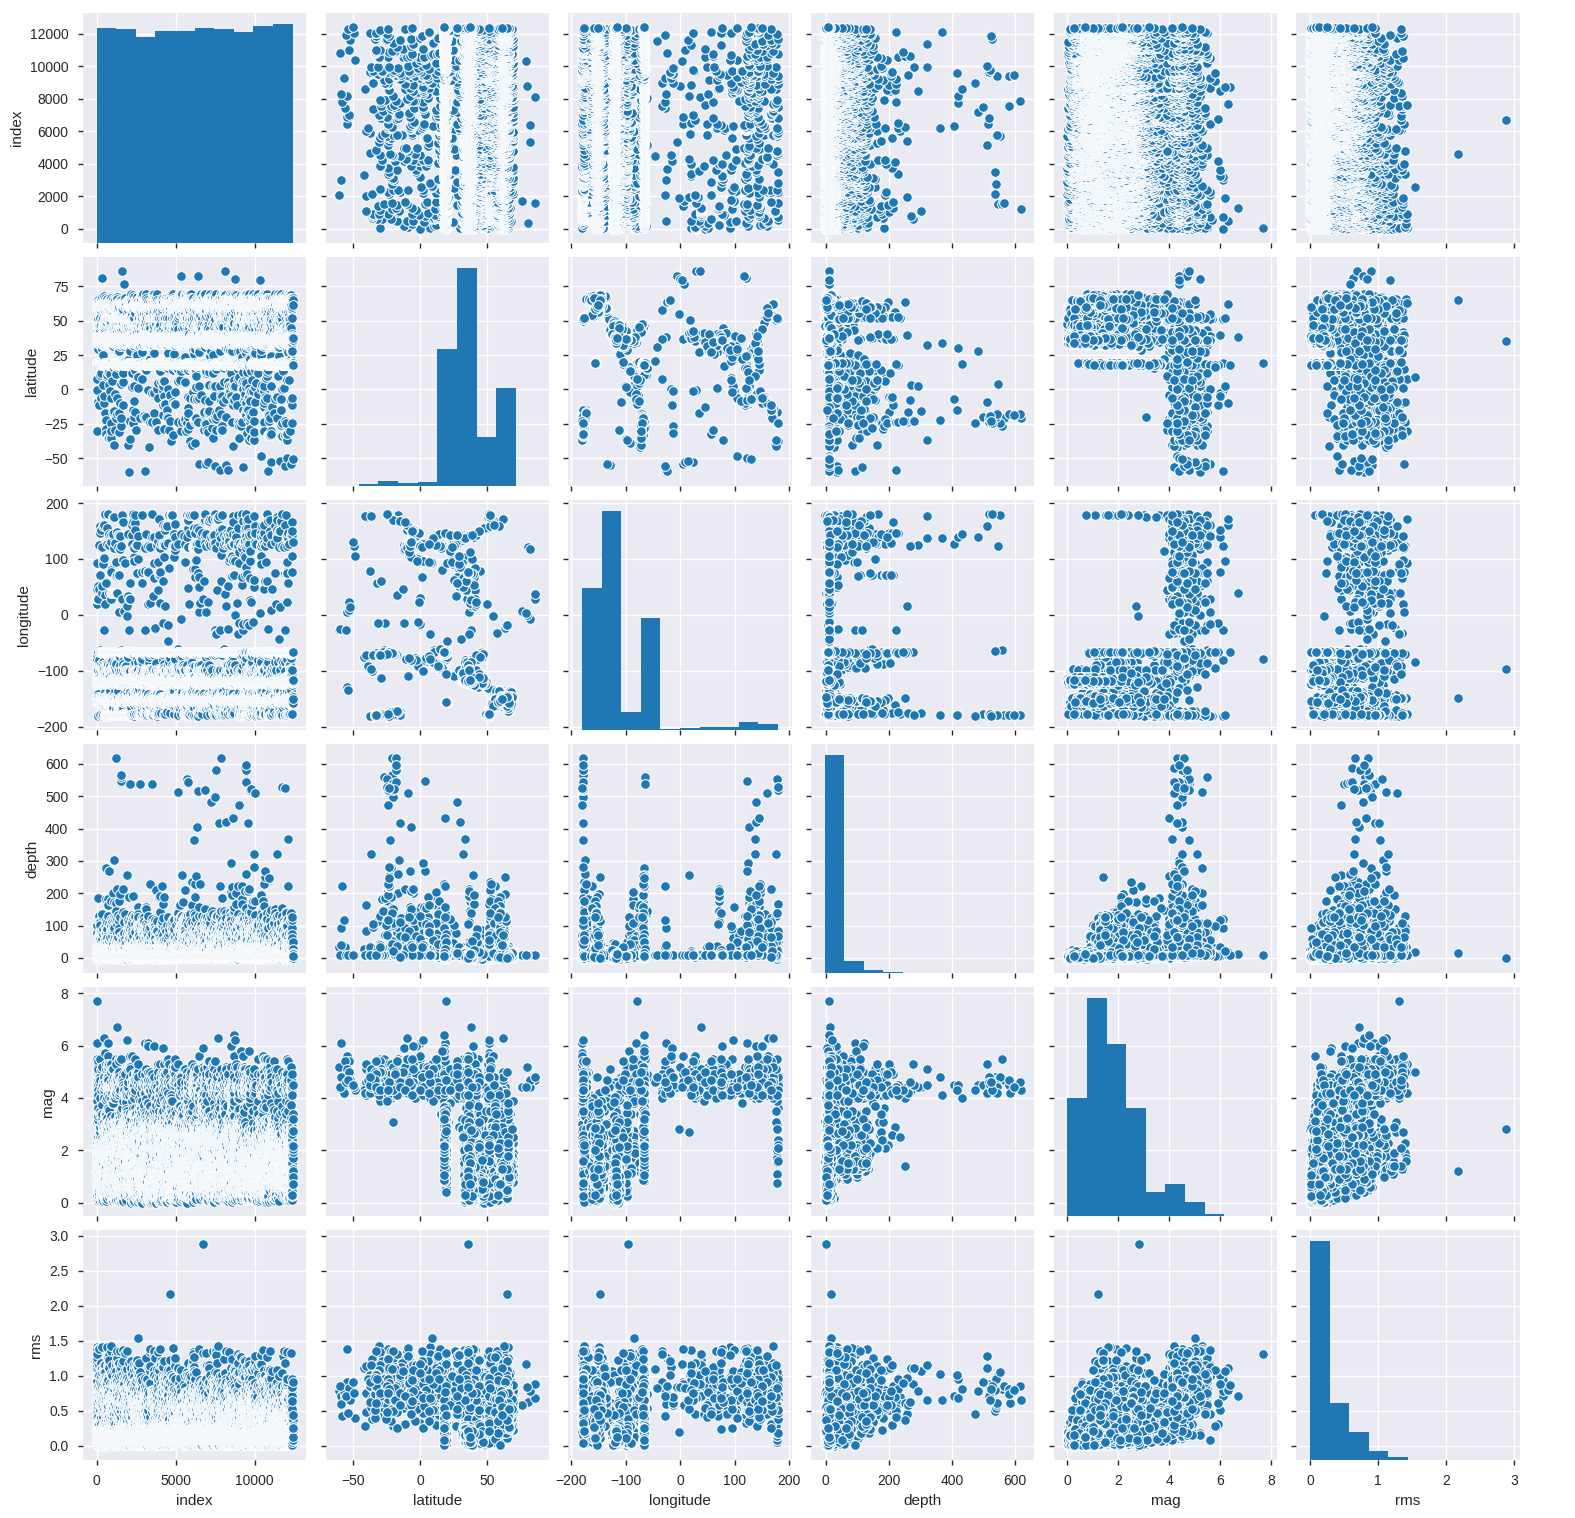

In [21]:
# This takes a long time to pull up
sns.pairplot(df)
plt.show();

In [22]:
# Remind me of dtypes
df.dtypes

index          int64
time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
magType       object
rms          float64
net           object
place         object
type          object
status        object
dtype: object

In [0]:
# Seperate each column to it's own dataframe
index_df   = pd.DataFrame(df['index'])
time_df    = pd.DataFrame(df['time'])
lat_df     = pd.DataFrame(df['latitude'])
lon_df     = pd.DataFrame(df['longitude'])
depth_df   = pd.DataFrame(df['depth'])
mag_df     = pd.DataFrame(df['mag'])
magType_df = pd.DataFrame(df['magType'])
rms_df     = pd.DataFrame(df['rms'])
net_df     = pd.DataFrame(df['net'])
place_df   = pd.DataFrame(df['place'])
type_df    = pd.DataFrame(df['type'])
status_df  = pd.DataFrame(df['status'])

In [0]:
# Add an index column to each new unindexed df
time_df['index'] = index_df
lat_df['index'] = index_df
lon_df['index'] = index_df
depth_df['index'] = index_df
mag_df['index'] = index_df
magType_df['index'] = index_df
net_df['index'] = index_df
place_df['index'] = index_df
status_df['index'] = index_df

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


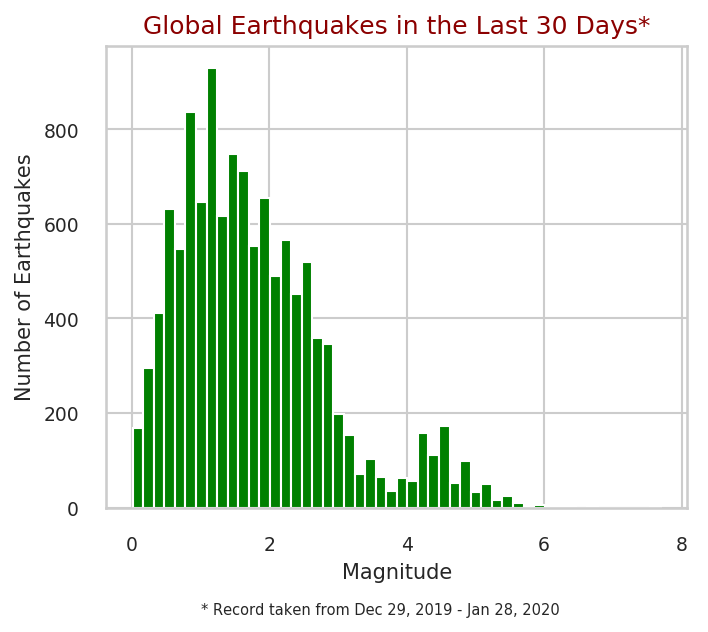

In [25]:
###############################################################################
###############################################################################
#                               THIS WORKS ! ! !                              #
###############################################################################
###############################################################################
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize=(5,4),dpi=150)
# Plot the magnitude and quantity of quakes
plt.hist(df['mag'], bins=50, color='green')

font = {'family': 'fantasy',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12}

plt.title('Global Earthquakes in the Last 30 Days*', fontdict=font)
plt.text(x=1,
         y=-225,
         s='* Record taken from Dec 29, 2019 - Jan 28, 2020', 
         fontsize=7)
plt.xlabel('Magnitude', fontsize=10)
plt.ylabel('Number of Earthquakes', fontsize=10)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()
###############################################################################
###############################################################################

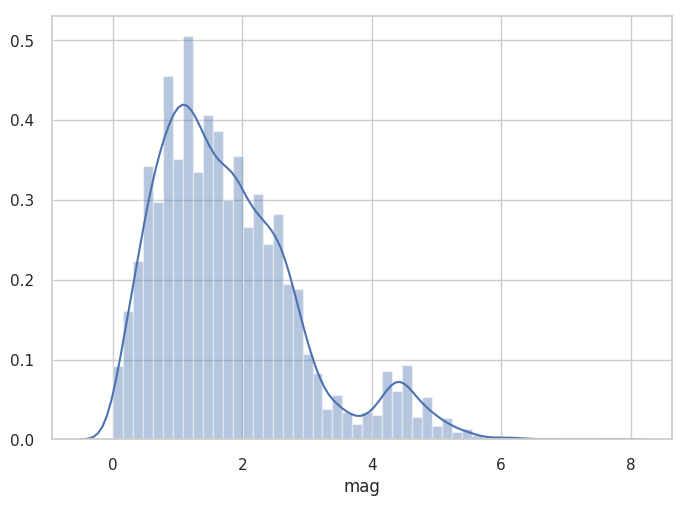

In [26]:
###############################################################################
###############################################################################
sns.distplot(df['mag']);
###############################################################################
###############################################################################

In [27]:
# Generate how many quakes were on the scale of 2.5 or less
less_than_2half_mag = df[df['mag'] < 2.5]
print(less_than_2half_mag['mag'].value_counts().sum())
print('That\'s',(9309/11961)*100,'percent of quakes were 2.5 or less.')

9309
That's 77.82794080762478 percent of quakes were 2.5 or less.


In [28]:
# Generate how many quakes are in each range
# 2.5 - 2.9
between_25_29_mag = df[(df['mag'] >= 2.5) & (df['mag'] <= 2.9)]
print('2.5 - 2.9:', between_25_29_mag['mag'].count())
print('The average earthquake magnitude is:',between_25_29_mag['mag'].mean())

# 3 - 3.4
between_3_34_mag = df[(df['mag'] >= 3) & (df['mag'] <= 3.4)]
print('\n3 - 3.4:', between_3_34_mag['mag'].count())
print('The average earthquake magnitude is:',between_3_34_mag['mag'].mean())

# 3.5 - 3.9
between_35_39_mag = df[(df['mag'] >= 3.5) & (df['mag'] <= 3.9)]
print('\n3.5 - 3.9:', between_35_39_mag['mag'].count())
print('The average earthquake magnitude is:',between_35_39_mag['mag'].mean())

# 4 - 4.4
between_4_44_mag = df[(df['mag'] >= 4) & (df['mag'] <= 4.4)]
print('\n4 - 4.4:', between_4_44_mag['mag'].count())
print('The average earthquake magnitude is:',between_4_44_mag['mag'].mean())

# 4.5 - 4.9
between_45_49_mag = df[(df['mag'] >= 4.5) & (df['mag'] <= 4.9)]
print('\n4.5 - 4.9:', between_45_49_mag['mag'].count())
print('The average earthquake magnitude is:',between_45_49_mag['mag'].mean())

# 5 - 5.4
between_5_54_mag = df[(df['mag'] >= 5) & (df['mag'] <= 5.4)]
print('\n5 - 5.4:', between_5_54_mag['mag'].count())
print('The average earthquake magnitude is:',between_5_54_mag['mag'].mean())

# 5.5 - 5.9
between_55_59_mag = df[(df['mag'] >= 5.5) & (df['mag'] <= 5.9)]
print('\n5.5 - 5.9:', between_55_59_mag['mag'].count())
print('The average earthquake magnitude is:',between_55_59_mag['mag'].mean())

# 6 - 6.4
between_6_64_mag = df[(df['mag'] >= 6) & (df['mag'] <= 6.4)]
print('\n6 - 6.4:', between_6_64_mag['mag'].count())
print('The average earthquake magnitude is:',between_6_64_mag['mag'].mean())

# 6.5 - 6.9
between_65_69_mag = df[(df['mag'] >= 6.5) & (df['mag'] <= 6.9)]
print('\n6.5 - 6.9:', between_65_69_mag['mag'].count())
print('The average earthquake magnitude is:',between_65_69_mag['mag'].mean())

# 7 - 7.4
between_7_74_mag = df[(df['mag'] >= 7) & (df['mag'] <= 7.4)]
print('\n7 - 7.4:', between_7_74_mag['mag'].count())
print('The average earthquake magnitude is:',between_7_74_mag['mag'].mean())

# 7.5 - 7.9
between_75_79_mag = df[(df['mag'] >= 7.5) & (df['mag'] <= 7.9)]
print('\n7.5 - 7.9:', between_75_79_mag['mag'].count())
print('The average earthquake magnitude is:',between_75_79_mag['mag'].mean())

# 8 - 8.4
between_8_84_mag = df[(df['mag'] >= 8) & (df['mag'] <= 8.4)]
print('\n8 - 8.4:', between_8_84_mag['mag'].count())
print('The average earthquake magnitude is:',between_8_84_mag['mag'].mean())

# 8.5 - 8.9
between_85_89_mag = df[(df['mag'] >= 8.5) & (df['mag'] <= 8.9)]
print('\n8.5 - 8.9:', between_85_89_mag['mag'].count())
print('The average earthquake magnitude is:',between_85_89_mag['mag'].mean())

# 9 - 9.4
between_9_94_mag = df[(df['mag'] >= 9) & (df['mag'] <= 9.4)]
print('\n9 - 9.4:', between_9_94_mag['mag'].count())
print('The average earthquake magnitude is:',between_9_94_mag['mag'].mean())

# 9.5+
between_95_plus_mag = df[(df['mag'] >= 9.5)]
print('\n9.5+:', between_95_plus_mag['mag'].count())
print('The average earthquake magnitude is:',between_95_plus_mag['mag'].mean())


2.5 - 2.9: 1126
The average earthquake magnitude is: 2.675941385435168

3 - 3.4: 383
The average earthquake magnitude is: 3.1655352480417744

3.5 - 3.9: 169
The average earthquake magnitude is: 3.672781065088757

4 - 4.4: 352
The average earthquake magnitude is: 4.255994318181821

4.5 - 4.9: 322
The average earthquake magnitude is: 4.6631055900621075

5 - 5.4: 109
The average earthquake magnitude is: 5.152293577981653

5.5 - 5.9: 26
The average earthquake magnitude is: 5.592307692307691

6 - 6.4: 12
The average earthquake magnitude is: 6.1499999999999995

6.5 - 6.9: 1
The average earthquake magnitude is: 6.7

7 - 7.4: 0
The average earthquake magnitude is: nan

7.5 - 7.9: 1
The average earthquake magnitude is: 7.7

8 - 8.4: 0
The average earthquake magnitude is: nan

8.5 - 8.9: 0
The average earthquake magnitude is: nan

9 - 9.4: 0
The average earthquake magnitude is: nan

9.5+: 0
The average earthquake magnitude is: nan


In [29]:
# Establish the count for things in the future
count_of_25_29 = between_25_29_mag['depth'].count()
count_of_3_39 = between_3_34_mag['depth'].count()
count_of_35_39 = between_35_39_mag['depth'].count()
count_of_4_49 = between_4_44_mag['depth'].count()
count_of_45_49 = between_45_49_mag['depth'].count()
count_of_5_59 = between_5_54_mag['depth'].count()
count_of_55_59 = between_55_59_mag['depth'].count()
count_of_6_69 = between_6_64_mag['depth'].count()
count_of_65_69 = between_65_69_mag['depth'].count()
count_of_7_79 = between_7_74_mag['depth'].count()
count_of_75_79 = between_75_79_mag['depth'].count()
count_of_8_89 = between_8_84_mag['depth'].count()
count_of_85_89 = between_85_89_mag['depth'].count()
count_of_9_99 = between_9_94_mag['depth'].count()
count_of_95_plus = between_95_plus_mag['depth'].count()

total_25_and_over = (count_of_25_29 + count_of_3_39 + count_of_35_39 + 
                     count_of_4_49 +count_of_45_49 + count_of_5_59 + 
                     count_of_55_59 + count_of_6_69 + count_of_65_69 + 
                     count_of_7_79 + count_of_75_79 + count_of_8_89 + 
                     count_of_85_89 + count_of_9_99 + count_of_95_plus)

# There's a few missing earthquakes ... move on
print(len(df['mag']),'- 9309 (Quakes under 2.5) -', total_25_and_over,
      '(Quakes 2.5 and over) \n=')
print(11961-total_25_and_over-9309)

11961 - 9309 (Quakes under 2.5) - 2501 (Quakes 2.5 and over) 
=
151


In [30]:
# I want to find the average depth of the ranged earthquakes
# Each range (0-2.4,2.5-2.9...9.5+)

print('List of the mean depth')

mean_depth_of_25_29 = between_25_29_mag['depth'].mean()
mean_depth_of_3_39 = between_3_34_mag['depth'].mean()
mean_depth_of_35_39 = between_35_39_mag['depth'].mean()
mean_depth_of_4_49 = between_4_44_mag['depth'].mean()
mean_depth_of_45_49 = between_45_49_mag['depth'].mean()
mean_depth_of_5_59 = between_5_54_mag['depth'].mean()
mean_depth_of_55_59 = between_55_59_mag['depth'].mean()
mean_depth_of_6_69 = between_6_64_mag['depth'].mean()
mean_depth_of_65_69 = between_65_69_mag['depth'].mean()
mean_depth_of_7_79 = between_7_74_mag['depth'].mean()
mean_depth_of_75_79 = between_75_79_mag['depth'].mean()
mean_depth_of_8_89 = between_8_84_mag['depth'].mean()
mean_depth_of_85_89 = between_85_89_mag['depth'].mean()
mean_depth_of_9_99 = between_9_94_mag['depth'].mean()
mean_depth_of_95_plus = between_95_plus_mag['depth'].mean()

# List of the mean depth in each range
ranges_of_mean_depth = [mean_depth_of_25_29,mean_depth_of_3_39,
                        mean_depth_of_35_39,mean_depth_of_4_49,
                        mean_depth_of_45_49,mean_depth_of_5_59,
                        mean_depth_of_55_59,mean_depth_of_6_69,
                        mean_depth_of_65_69,mean_depth_of_7_79,
                        mean_depth_of_75_79,mean_depth_of_8_89,
                        mean_depth_of_85_89,mean_depth_of_9_99,
                        mean_depth_of_95_plus]
# print each 
for i in range(len(ranges_of_mean_depth)):
  print(ranges_of_mean_depth[i])

print('\n\nList of the mean mag')
mean_mag_of_25_29 = between_25_29_mag['mag'].mean()
mean_mag_of_3_39 = between_3_34_mag['mag'].mean()
mean_mag_of_35_39 = between_35_39_mag['mag'].mean()
mean_mag_of_4_49 = between_4_44_mag['mag'].mean()
mean_mag_of_45_49 = between_45_49_mag['mag'].mean()
mean_mag_of_5_59 = between_5_54_mag['mag'].mean()
mean_mag_of_55_59 = between_55_59_mag['mag'].mean()
mean_mag_of_6_69 = between_6_64_mag['mag'].mean()
mean_mag_of_65_69 = between_65_69_mag['mag'].mean()
mean_mag_of_7_79 = between_7_74_mag['mag'].mean()
mean_mag_of_75_79 = between_75_79_mag['mag'].mean()
mean_mag_of_8_89 = between_8_84_mag['mag'].mean()
mean_mag_of_85_89 = between_85_89_mag['mag'].mean()
mean_mag_of_9_99 = between_9_94_mag['mag'].mean()
mean_mag_of_95_plus = between_95_plus_mag['mag'].mean()

# List of the mean mag in each range
ranges_of_mean_mag = [mean_mag_of_25_29,mean_mag_of_3_39,mean_mag_of_35_39,
                      mean_mag_of_4_49,mean_mag_of_45_49,mean_mag_of_5_59,
                      mean_mag_of_55_59,mean_mag_of_6_69,mean_mag_of_65_69,
                      mean_mag_of_7_79,mean_mag_of_75_79,mean_mag_of_8_89,
                      mean_mag_of_85_89,mean_mag_of_9_99,mean_mag_of_95_plus]

for i in range(len(ranges_of_mean_mag)):
  print(ranges_of_mean_mag[i])

List of the mean depth
14.403081705150974
17.060757180156656
15.842130177514791
64.7315909090909
72.35515527950312
47.62192660550456
45.076923076923066
39.589999999999996
11.91
nan
10.0
nan
nan
nan
nan


List of the mean mag
2.675941385435168
3.1655352480417744
3.672781065088757
4.255994318181821
4.6631055900621075
5.152293577981653
5.592307692307691
6.1499999999999995
6.7
nan
7.7
nan
nan
nan
nan


In [31]:
# All earthquakes
df['depth'].mean()

17.901514570926672

In [32]:
# Excluding mag less than 2.5
df[df['mag']>=2.5].describe()
#  The mean depth of quakes mag 2.5 and greater is 30.17 with a mean mag of 3.43

,index,latitude,longitude,depth,mag,rms
count,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000
mean,5853.468326,22.180031,-57.960428,30.174091,3.433786,0.426005
std,3412.256666,21.690508,87.422194,68.837506,0.877457,0.331169
min,4.000000,-60.407300,-179.998100,-2.000000,2.500000,0.000000
25%,2938.000000,17.890600,-94.369825,7.000000,2.700000,0.160000
50%,5815.500000,17.950700,-66.852550,10.000000,3.045000,0.280000
75%,8593.750000,35.470000,-66.750000,16.000000,4.300000,0.660000
max,12396.000000,86.266300,179.997000,619.150000,7.700000,2.880000


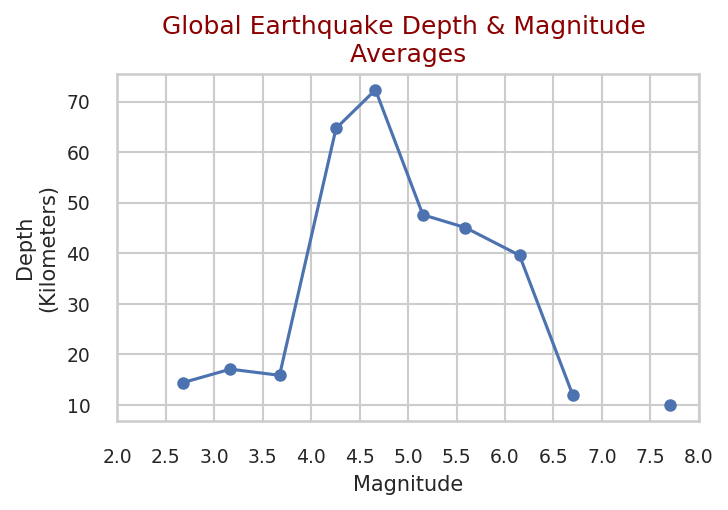

In [33]:
# Line plot the two

# Mean mag
x =[mean_mag_of_25_29,mean_mag_of_3_39,mean_mag_of_35_39,mean_mag_of_4_49,
   mean_mag_of_45_49,mean_mag_of_5_59,mean_mag_of_55_59,mean_mag_of_6_69,
   mean_mag_of_65_69,mean_mag_of_7_79,mean_mag_of_75_79,mean_mag_of_8_89,
   mean_mag_of_85_89,mean_mag_of_9_99,mean_mag_of_95_plus]

# Mean depth
y =[mean_depth_of_25_29,mean_depth_of_3_39,mean_depth_of_35_39,
   mean_depth_of_4_49,mean_depth_of_45_49,mean_depth_of_5_59,
   mean_depth_of_55_59,mean_depth_of_6_69,mean_depth_of_65_69,
   mean_depth_of_7_79,mean_depth_of_75_79,mean_depth_of_8_89,
   mean_depth_of_85_89,mean_depth_of_9_99,mean_depth_of_95_plus]

font = {'family': 'fantasy',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12}

# Shorthand notation
# fmt = '[color][marker][line]'
# use on .plot()

plt.figure(figsize=(5,3),dpi=150)
plt.title('Global Earthquake Depth & Magnitude \nAverages', fontdict=font)
plt.ylabel('Depth\n(Kilometers)', fontsize=10)
plt.xlabel('Magnitude', fontsize=10)
plt.plot(x,y, 'bo-')
xl = [2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8]
plt.xticks(xl,fontsize=9)
plt.yticks(fontsize=9)
plt.show();

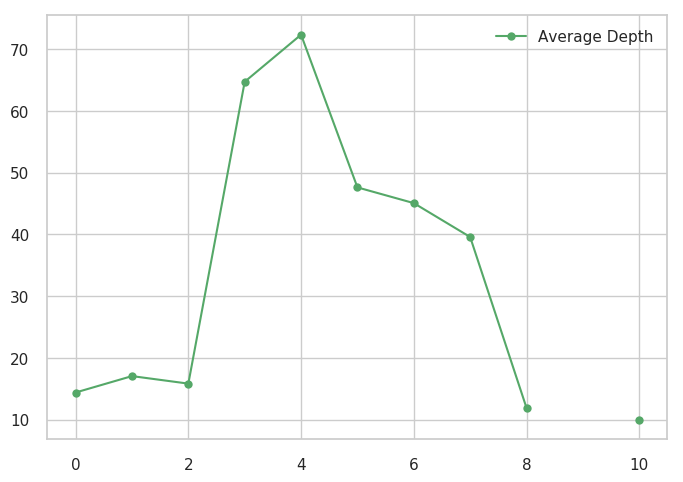

In [34]:
# plt.plot(x,'rx-', label='Average Magnitude')
plt.plot(y,'go-', label='Average Depth')
plt.legend()

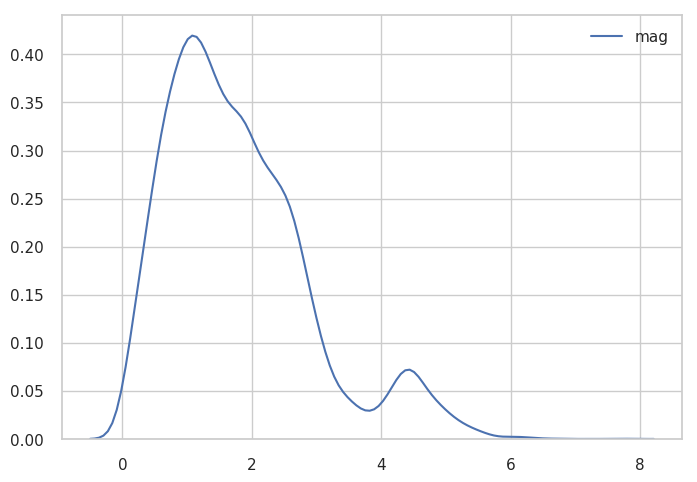

In [35]:
sns.kdeplot(mag_df['mag'])

# Baseplot Maps

In [36]:
# Top 5 magnitude earthquakes
the_top5_mag = df['mag'].sort_values(ascending=False).head()
top5_mag = df.loc[(df['mag'] >= 6.3)]
print(the_top5_mag)
top5_mag.reset_index(inplace=True)
top5_mag.sort_values(ascending=False,by=['mag'])


40      7.7
1255    6.7
8367    6.4
468     6.3
7352    6.3
Name: mag, dtype: float64


,level_0,index,time,latitude,longitude,depth,mag,magType,rms,net,place,type,status
0,40,40,2020-01-28T19:10:25.000Z,19.4400,-78.7545,10.00,7.7,mww,1.31,us,"125km NNW of Lucea, Jamaica",earthquake,reviewed
2,1255,1289,2020-01-24T17:55:14.213Z,38.3898,39.0814,11.91,6.7,mww,0.72,us,"9km NNE of Doganyol, Turkey",earthquake,reviewed
4,8367,8708,2020-01-07T08:24:26.567Z,17.9161,-66.8125,10.00,6.4,mww,0.87,us,"8km S of Indios, Puerto Rico",earthquake,reviewed
1,468,475,2020-01-27T05:02:01.061Z,-10.1059,161.0240,17.68,6.3,mww,1.12,us,"105km WNW of Kirakira, Solomon Islands",earthquake,reviewed
3,7352,7660,2020-01-09T08:38:08.316Z,62.3408,171.0597,10.00,6.3,mww,0.80,us,"Chukotskiy Avtonomnyy Okrug, Russia",earthquake,reviewed


In [37]:
# Establish the coords of the top 5
lat = []
lon = []

for i in top5_mag['latitude']:
  lat.append(i)
for i in top5_mag['longitude']:
  lon.append(i)
lat

[19.44, -10.1059, 38.3898, 62.3408, 17.9161]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


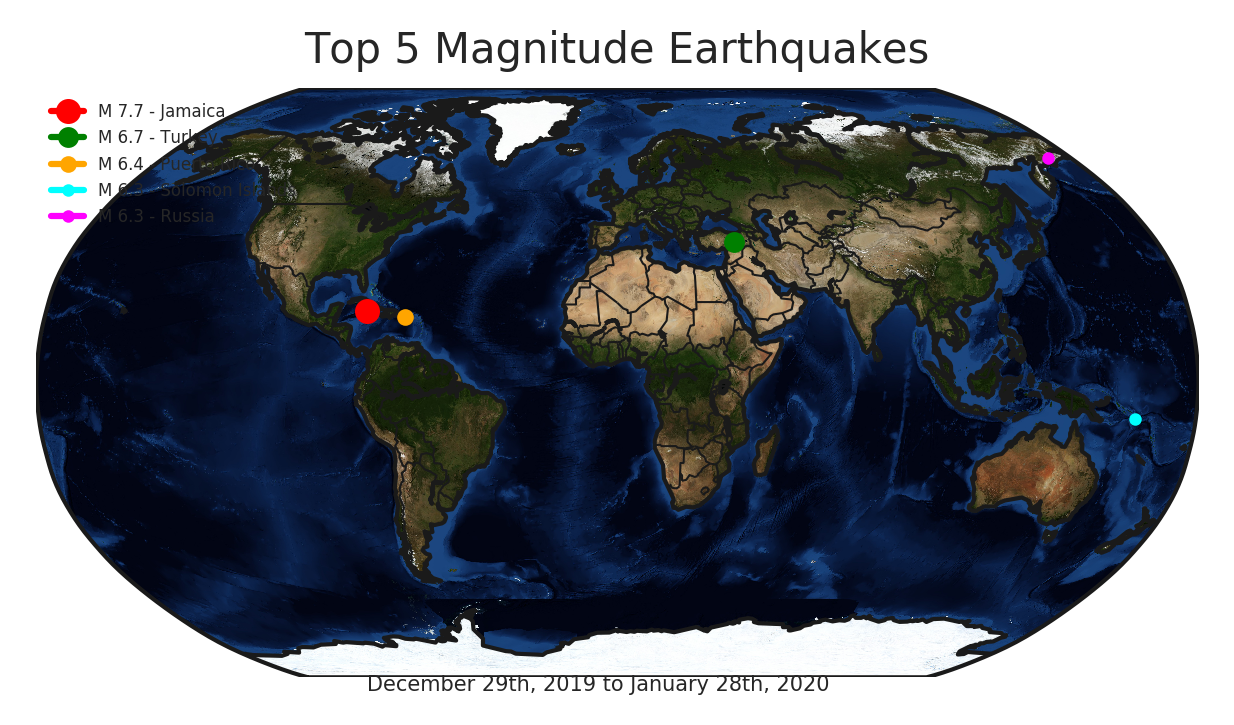

In [38]:
# The real map
m = Basemap(projection='robin',lon_0=0,resolution='c')
plt.figure(figsize=(5,5), dpi=300)

m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries()
# m.drawstates()
# m.drawrivers()
m.bluemarble()

# Q1
a1,a2 = m(lon[0],lat[0])
m.plot(a1,a2,marker='o',color='red',markersize=6, label='M 7.7 - Jamaica')

# Q2
b1,b2 = m(lon[2],lat[2])
m.plot(b1,b2,marker='o',color='green',markersize=5, label='M 6.7 - Turkey')

# Q3
c1,c2 = m(lon[4],lat[4])
m.plot(c1,c2,marker='o',color='orange',markersize=4, label='M 6.4 - Puerto Rico')

# Q4
d1,d2 = m(lon[1],lat[1])
m.plot(d1,d2,marker='o',color='cyan',markersize=3, label='M 6.3 - Solomon Islands')

# Q5
e1,e2 = m(lon[3],lat[3])
m.plot(e1,e2,marker='o',color='magenta',markersize=3, 
       label='M 6.3 - Russia')

# draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,360.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title('Top 5 Magnitude Earthquakes', fontsize=10)
plt.suptitle(x=.5,y=.30,t='December 29th, 2019 to January 28th, 2020', fontsize=5)
plt.legend(fontsize=4)
plt.show()

No handles with labels found to put in legend.


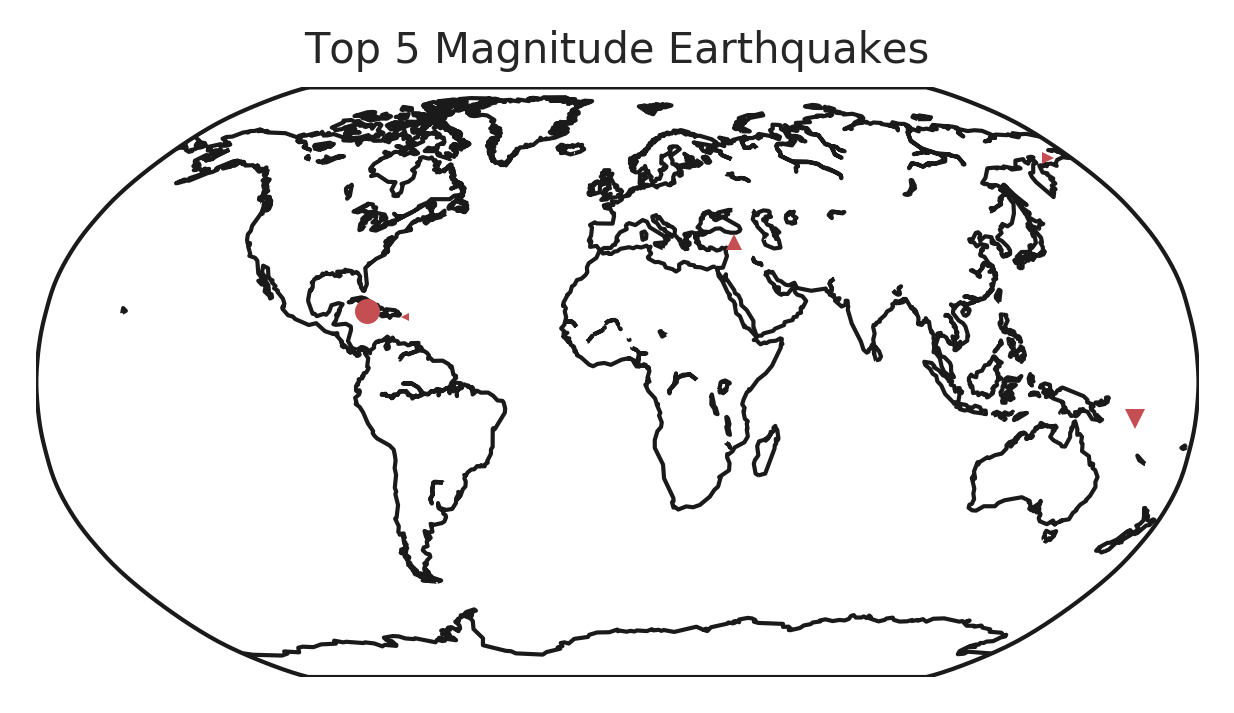

In [39]:
# The test map
m = Basemap(projection='robin',lon_0=0,resolution='c')
plt.figure(figsize=(5,5), dpi=300)

m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# m.drawcountries()
# m.drawstates()
# m.drawrivers()
# m.bluemarble()

# Q1
a1,a2 = m(lon[0],lat[0])
m.plot(a1,a2,'ro',markersize=6)

# Q2
b1,b2 = m(lon[1],lat[1])
m.plot(b1,b2,'rv',markersize=5)

# Q3
c1,c2 = m(lon[2],lat[2])
m.plot(c1,c2,'r^',markersize=4)

# Q4
d1,d2 = m(lon[3],lat[3])
m.plot(d1,d2,'r>',markersize=3)

# Q5
e1,e2 = m(lon[4],lat[4])
m.plot(e1,e2,'r<',markersize=2)

# draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,360.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title('Top 5 Magnitude Earthquakes', fontsize=10)
plt.legend(fontsize=4)
plt.show()

# (Q)BINS & Graph the number of quakes

In [40]:
qbins = pd.qcut(df['mag'],4)
qbins

0                         (0.97, 1.6]
1                         (1.6, 2.38]
2                         (1.6, 2.38]
3        (0.009000000000000001, 0.97]
4                         (2.38, 7.7]
                     ...             
11956                     (2.38, 7.7]
11957                     (1.6, 2.38]
11958                     (1.6, 2.38]
11959    (0.009000000000000001, 0.97]
11960                     (2.38, 7.7]
Name: mag, Length: 11961, dtype: category
Categories (4, interval[float64]): [(0.009000000000000001, 0.97] < (0.97, 1.6] < (1.6, 2.38] < (2.38, 7.7]]

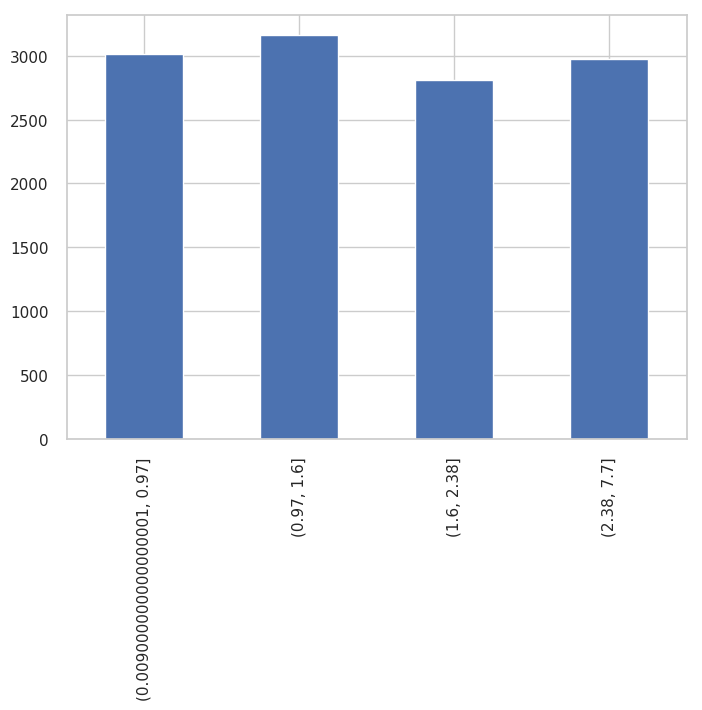

In [41]:
qbins.value_counts(sort=False).plot(kind='bar')

In [42]:
# Set bin ranges
bins=[0,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5]
bins

[0, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]

In [43]:
# Apply bins
binned_data = pd.cut(df['mag'], bins)
binned_data

0        (0.0, 2.5]
1        (0.0, 2.5]
2        (0.0, 2.5]
3        (0.0, 2.5]
4        (4.0, 4.5]
            ...    
11956    (4.0, 4.5]
11957    (0.0, 2.5]
11958    (0.0, 2.5]
11959    (0.0, 2.5]
11960    (3.0, 3.5]
Name: mag, Length: 11961, dtype: category
Categories (15, interval[float64]): [(0.0, 2.5] < (2.5, 3.0] < (3.0, 3.5] < (3.5, 4.0] < ... <
                                     (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]

In [44]:
# View how many quakes are in each bin/range
label_prep = binned_data.value_counts()
label_prep

(0.0, 2.5]    9389
(2.5, 3.0]    1200
(4.0, 4.5]     418
(3.0, 3.5]     401
(4.5, 5.0]     261
(3.5, 4.0]     175
(5.0, 5.5]      90
(5.5, 6.0]      16
(6.0, 6.5]       9
(7.5, 8.0]       1
(6.5, 7.0]       1
(9.0, 9.5]       0
(8.5, 9.0]       0
(8.0, 8.5]       0
(7.0, 7.5]       0
Name: mag, dtype: int64

In [45]:
# Total number of quakes
binned_data.value_counts().sum()

11961

In [46]:
for i in range(len(label_prep)):
  print(label_prep[i])

9389
9389
9389
1200
175
261
16
1
1
0
0
1
0
0
0


/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


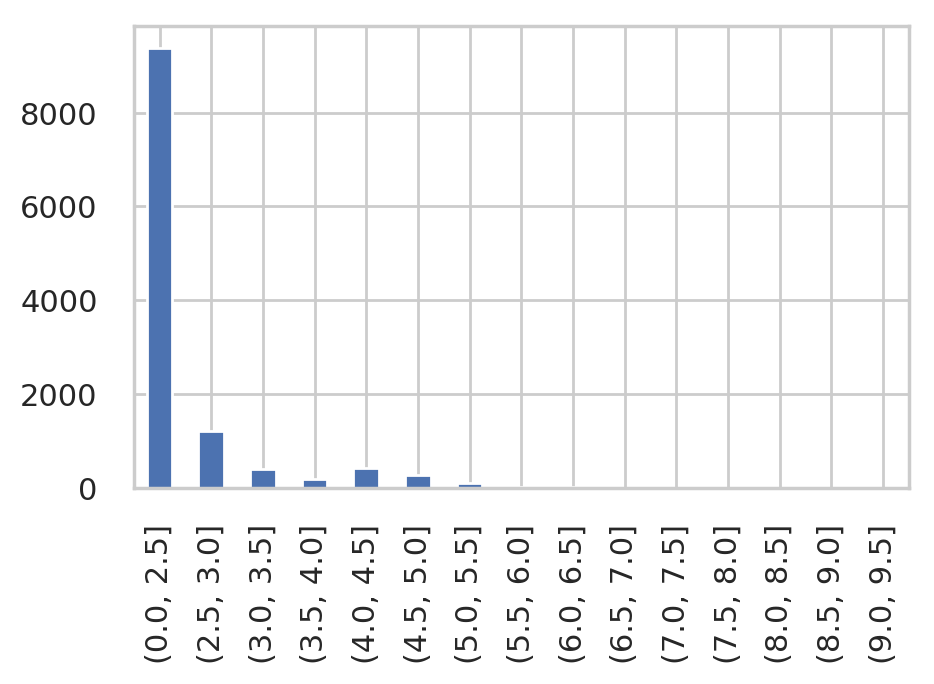

In [47]:
fig, ax = plt.subplots()
ax = binned_data.value_counts(sort=False).plot(kind='bar')
fig.set_size_inches(5, 3)
fig.set_dpi(200)
# plt.figure(figsize=(1,1.5),dpi=200)

plt.show();

# Easter Egg (Stretch Goal)

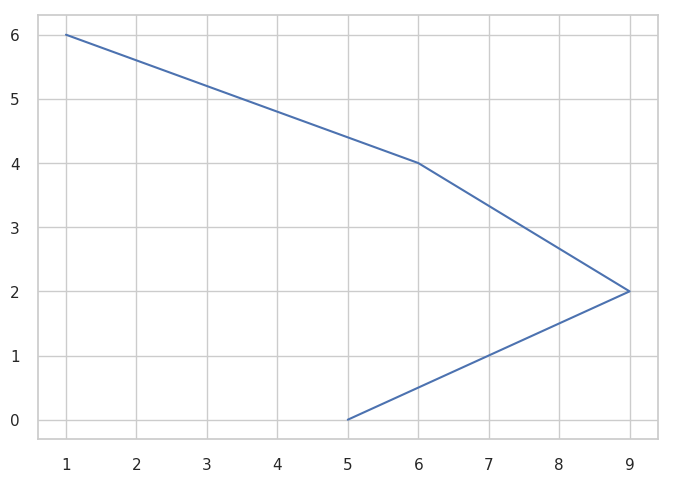

In [48]:
# THIS MEANS NOTHING - JUST BECAUSE I CAN
# CONSIDER IT AN EASTER EGG :)
x=[1,6,9,5]
y=[6,4,2,0]

plt.plot(x,y)
plt.show()